# Interactive Recommendation System with Word Embeddings using Word2Vec, Plotly, and NetworkX

## Project Breakdown
- Task 1: Introduction
- Task 2: Exploratory Data Analysis and Preprocessing
- Task 3: Word2Vec with Gensim
- Task 4: Exploring Results (you are here)
- Task 5: Building and Visualizing Interactive Network Graph

## Task 4: Exploring Results

In [1]:
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models.word2vec import Word2Vec
import numpy as np

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#matplotlib.rcParams['figure.dpi'] = 800
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import random
random.seed(3)

In [2]:
model = Word2Vec.load('Data/w2v.model')

In [3]:
model.wv.most_similar(['orange'], negative=['lemon'],topn=3)

[('mandarine', 0.4832656979560852),
 ('falernum', 0.44735437631607056),
 ('juiceorange', 0.4360411763191223)]

In [4]:
model.wv.most_similar(['orange'], topn=3)

[('tangerine', 0.9022946953773499),
 ('lemon', 0.8672725558280945),
 ('clementine', 0.8204278945922852)]

In [5]:
with open('Data/items_for_sale.txt', 'r') as f:
    items_for_sale = f.read().split()
    
items_for_sale

['salt',
 'pepper',
 'fresh',
 'oil',
 'sugar',
 'butter',
 'garlic',
 'cheese',
 'water',
 'lemon',
 'leaves',
 'cloves',
 'powder',
 'chicken',
 'milk',
 'unsalted',
 'eggs',
 'vanilla',
 'egg',
 'vinegar',
 'vegetable',
 'baking',
 'extract',
 'wine',
 'tomatoes',
 'parsley',
 'brown',
 'virgin',
 'cinnamon',
 'chocolate',
 'orange',
 'lime',
 'bread',
 'mustard',
 'seeds',
 'bell',
 'rice',
 'ginger',
 'thyme',
 'cilantro',
 'broth',
 'potatoes',
 'beef',
 'celery',
 'tomato',
 'beans',
 'parmesan',
 'honey',
 'soda',
 'zest',
 'clove',
 'stock',
 'sour',
 'leaf',
 'mushrooms',
 'carrots',
 'syrup',
 'cayenne',
 'bacon',
 'pork',
 'coconut',
 'oregano',
 'mayonnaise',
 'chili',
 'chile',
 'cheddar',
 'seasoning',
 'nutmeg',
 'canola',
 'chips',
 'mint',
 'rosemary',
 'scallions',
 'chives',
 'peanut',
 'breast',
 'cornstarch',
 'almonds',
 'cider',
 'shrimp',
 'shallots',
 'worcestershire',
 'yogurt',
 'walnuts',
 'spinach',
 'cocoa',
 'olives',
 'jalapeno',
 'pineapple',
 'butterm

In [7]:
words, vectors = [], []

for item in items_for_sale:
    try:
        vectors.append(model.wv.get_vector(item))
        words.append(item)
    except KeyError:
        print(f"key error for {item}")

In [8]:
vectors[0]

array([-1.178253  , -2.0659504 , -4.3327556 , -0.20205295,  1.9138607 ,
       -0.07459018,  0.24876513,  2.1356816 ,  1.2767304 , -4.485331  ,
        1.3798847 ,  1.9159521 , -2.2195785 , -1.3019089 ,  0.68739426,
       -3.353269  ,  1.2072477 , -3.41303   , -1.3364966 ,  2.7525544 ,
       -1.6883502 , -2.200645  ,  1.4002581 , -1.9549955 , -3.8220096 ,
       -2.5380929 ,  1.3401303 ,  3.7816937 , -1.7486324 , -2.083009  ,
        2.0602365 ,  2.0395393 ,  1.3995522 ,  3.110085  ,  1.2750652 ,
       -3.1025715 , -0.1634581 ,  1.3003561 , -3.394496  , -4.2977085 ,
       -2.1300838 , -0.8845624 ,  0.10278787, -0.75477874, -5.0854077 ,
       -0.38553557,  4.02846   ,  1.2687988 , -5.538442  , -1.8878298 ,
       -4.208692  , -1.3688735 ,  0.5570616 , -0.8757027 , -2.596939  ,
       -3.823237  ,  2.7182927 , -1.8635831 ,  0.96065205,  1.3559742 ,
        0.7197915 , -3.54195   ,  1.5524642 ,  0.4328344 ,  1.8721694 ,
       -3.2226312 ,  1.8719865 ,  0.67697996, -0.20713164,  2.69

In [11]:
print(f"len: {len(vectors)}")

len: 911


In [9]:
sims = cosine_similarity(vectors, vectors)

In [10]:
sims.shape

(911, 911)

In [13]:
test_matrix=[[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]]
for i in range(len(test_matrix)):
    test_matrix[i][i]=0

print(test_matrix)

[[0, 1, 1, 1], [1, 0, 1, 1], [1, 1, 0, 1], [1, 1, 1, 0]]


In [14]:
for i in range(len(vectors)):
    sims[i][i] = False

In [17]:
k = 15
indices = list(range(len(vectors)))
indices[:15]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [18]:
random.shuffle(indices)
indices = indices[:k]
indices

[721, 775, 633, 708, 551, 452, 407, 16, 217, 143, 748, 465, 422, 124, 24]

In [19]:
small_vectors = [vectors[i] for i in indices]
small_words = [words[i] for i in indices]

In [21]:
small_sims = cosine_similarity(small_vectors, small_vectors)

In [22]:
small_sims.shape

(15, 15)

In [23]:
for x in range(len(indices)):
    small_sims[x][x] = False

small_sims

array([[ 0.        ,  0.11092616,  0.07800756,  0.13775326, -0.04145076,
        -0.14563495, -0.10077437,  0.10516426, -0.01150314,  0.08275806,
         0.15959503,  0.29340577,  0.08841843,  0.04124245,  0.39217505],
       [ 0.11092616,  0.        ,  0.00266768,  0.22904396,  0.07245015,
        -0.04872101,  0.14404133,  0.14671561,  0.05633824,  0.03745228,
        -0.06276081,  0.0257452 ,  0.13210252, -0.00560334, -0.13794664],
       [ 0.07800756,  0.00266768,  0.        , -0.08272403,  0.30009738,
         0.13747981, -0.03965556, -0.0139721 ,  0.2583905 ,  0.32318354,
         0.2250066 ,  0.11113156,  0.29801086,  0.05411277,  0.09242497],
       [ 0.13775326,  0.22904396, -0.08272403,  0.        ,  0.0188152 ,
         0.23930721,  0.4444095 , -0.04006763, -0.08790523, -0.09120291,
        -0.03044535,  0.17659353,  0.08242837,  0.13163956, -0.12179065],
       [-0.04145076,  0.07245015,  0.30009738,  0.0188152 ,  0.        ,
         0.1435826 ,  0.0714218 , -0.05331711, 

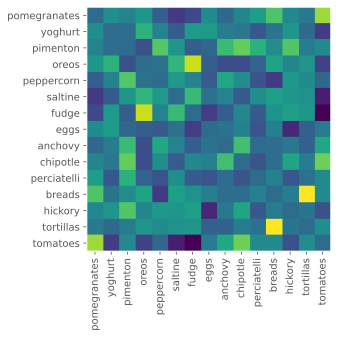

In [24]:
# adapted from https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html

fig, ax = plt.subplots()
im = ax.imshow(small_sims)

ax.set_xticks(np.arange(len(small_vectors)))
ax.set_yticks(np.arange(len(small_vectors)))

ax.set_xticklabels(small_words)
ax.set_yticklabels(small_words)
ax.grid(False)

plt.setp(ax.get_xticklabels(), rotation=90)

fig.tight_layout()
plt.show()